# Method 1

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))
b = 5
y_true = (0.5 * x_data) + b + noise

x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])
my_data = pd.concat([x_df, y_df], axis=1)
my_data.head()

,X Data,Y
0,0.00000,5.516930
1,0.00001,2.959392
2,0.00002,4.910335
3,0.00003,3.970835
4,0.00004,5.568344


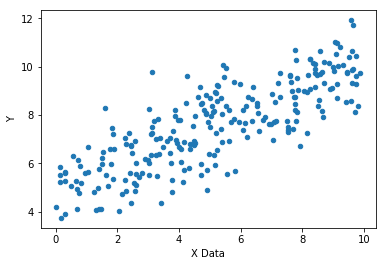

In [15]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [25]:
import tensorflow as tf

batch_size = 8

m = tf.Variable(0.5)
b = tf.Variable(1.0)

xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

y_model = m*xph + b

error = tf.reduce_sum(tf.square(y_model - yph))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(
            len(x_data),
            size=batch_size
        )
        feed = {
            xph: x_data[rand_ind], 
            yph: y_true[rand_ind]
        }
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [23]:
model_m

0.48565963

In [24]:
model_b

4.937622

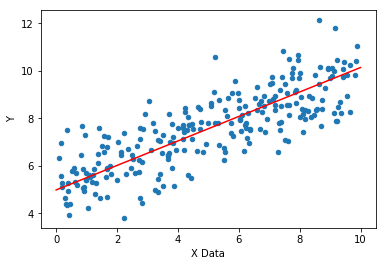

In [33]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
y_hat = (x_data * model_m) + model_b
plt.plot(x_data, y_hat, 'r')

# Method 2 - TF Estimator

In [ ]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

print(x_train.shape, x_eval.shape, y_train.shape, y_eval.shape)

(700000,) (300000,) (700000,) (300000,)


In [47]:
input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train},
    y_train,
    batch_size=4,
    num_epochs=None,
    shuffle=True
)
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train},
    y_train,
    batch_size=4,
    num_epochs=1000,
    shuffle=False
)
eval_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_eval},
    y_eval,
    batch_size=4,
    num_epochs=1000,
    shuffle=False
)

In [ ]:
estimator.train(
    input_fn=input_func,
    steps=1000
)

In [ ]:
train_metrics = estimator.evaluate(
    input_fn=train_input_func,
    steps=1000
)

In [ ]:
eval_metrics = estimator.evaluate(
    input_fn=eval_input_func, 
    steps=1000
)

In [57]:
print(train_metrics)
print(eval_metrics)

{'average_loss': 1.0232787, 'label/mean': 7.5308824, 'loss': 4.093115, 'prediction/mean': 7.4285, 'global_step': 2000}
{'average_loss': 1.0087863, 'label/mean': 7.48006, 'loss': 4.0351453, 'prediction/mean': 7.395017, 'global_step': 2000}


In [59]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn(
    {'x': np.linspace(0,10,10)}, # new data
    shuffle=False
)
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/r6/10cb02ks535bkw6hy0547w4h0000gn/T/tmproaihxzi/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.849808], dtype=float32)},
 {'predictions': array([5.4194417], dtype=float32)},
 {'predictions': array([5.9890747], dtype=float32)},
 {'predictions': array([6.558708], dtype=float32)},
 {'predictions': array([7.1283417], dtype=float32)},
 {'predictions': array([7.6979747], dtype=float32)},
 {'predictions': array([8.267608], dtype=float32)},
 {'predictions': array([8.837241], dtype=float32)},
 {'predictions': array([9.406876], dtype=float32)},
 {'predictions': array([9.976508], dtype=float32)}]

In [ ]:
predictions = []
for x in estimator.predict(input_fn=input_fn_predict): 
    predictions.append(x['predictions'])

In [62]:
predictions

[array([4.849808], dtype=float32),
 array([5.4194417], dtype=float32),
 array([5.9890747], dtype=float32),
 array([6.558708], dtype=float32),
 array([7.1283417], dtype=float32),
 array([7.6979747], dtype=float32),
 array([8.267608], dtype=float32),
 array([8.837241], dtype=float32),
 array([9.406876], dtype=float32),
 array([9.976508], dtype=float32)]

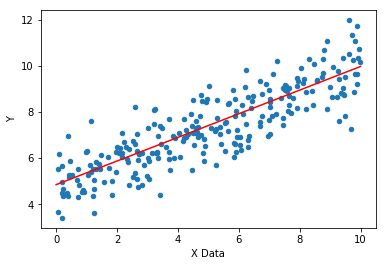

In [63]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(np.linspace(0,10,10), predictions, 'r')